# Statsmodels
statsmodels is a Python module that provides classes and functions for 
1. **the estimation of many different statistical models**, 
2. as well as for **conducting statistical tests**, and 
3. **statistical data exploration**. 

An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at www.statsmodels.org.

## Linear Regression Models
### Ordinary Least Squares

For univariate $y$ and multivariate $X$, if we want to find the relationship between each variate of $X$ and $y$ simultaneously, we need to fit a Model
$$ y=X\beta$$
In fact, we cannot attribute all loads ($\beta$s) to certain variables, so estimated residuals ($\hat{\epsilon}$s) exist. And all the $\beta$s are estimated $\beta$s(i.e. $\hat{\beta}$s), we can rewrite the model above as:
$$ y=X\hat{\beta}+\hat{\epsilon}$$
In order to find best estimated coefficients $\hat{\beta}$s, we need to optimize the sum square of residuals
$$ \min \hat{\epsilon}'\hat{\epsilon}$$
The Lagrange function of this optimization is 
$$\begin{align} \mathcal{L}&=\hat{\epsilon}'\hat{\epsilon} \\
&=(y-X\hat{\beta})'(y-X\hat{\beta})\\
&=(y'-X'\hat{\beta}')(y-X\hat{\beta})\\
&=y'y-2X'\hat{\beta}'y+X'\hat{\beta}'X\hat{\beta}\\
\end{align}$$
Calculate the first order condition:
$$ \frac{\partial\mathcal{L}}{\partial\hat{\beta}}=-2X'y+2X'X\hat{\beta}=0$$
So 
$$\hat{\beta}=(X'X)^{-1}(X'y)$$
Forcast $\hat{y}$
$$\hat{y}=X\hat{\beta}$$
Estimate residuals
$$\hat{\epsilon} = y-\hat{y}$$

### Classical assumptions of linear regression
1. **Normality of the dependent variable**. Regression is robust to moderate violations of normality, provided there are no outliers. If the  dependent variable is seriously non-normal, an appropriate transformation is recommended.
2. **Linearity of relationship between the dependent variable and each independent variable**. Special regression procedures (e.g., polynomial regression) can be used to model non-linear relationships.
3. **Homoscedasticity (homogeneity of variance)**. This means the dependent variable scores have the same dispersion/variability around the regression line through them, meaning they have equal spread. Regression is robust to moderate violations of homoscedasticity. A transformation of the variables is often recommended to address serious heteroscedasticity.
4. **Independence**. Each case should be independent of one another. This is a critical assumption for statistical tests to be accurate. If the data have a hierarchical structure (e.g., employees within work teams), multi-level regression techniques may be appropriate (see Tabachnick & Fidell, 2001).
5. **Multicollinearity**.


### The assumptions of regression can be partially checked by 
+ examining the distribution of the dependent variable and bivariate scatterplots, or through 
+ examination of the residuals (the difference between observed and predicted dependent variable scores) after running an initial regression. 


In [28]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(20190314)
# initialization 

In [29]:
# create artificial data
nsample = 100
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
beta = np.array([1, 1, 10])
e = np.random.normal(size=nsample) # noise or measurement error

In [30]:
X = sm.add_constant(X) # add a column of 1 for intercept
y = np.dot(X, beta) + e # response with noise

In [31]:
# fit by OLS 
model = sm.OLS(y, X) #create model
results = model.fit() # fit model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.453e+06
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          1.98e-241
Time:                        11:07:42   Log-Likelihood:                -142.29
No. Observations:                 100   AIC:                             290.6
Df Residuals:                      97   BIC:                             298.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3069      0.300      4.359      0.0

In [32]:
print(dir(results))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params'

In [33]:
print('Parameters: ', results.params)  # Get specific statistics
print('R2: ', results.rsquared)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())

Parameters:  [ 1.30686578  0.79337684 10.02152193]
R2:  0.9999891098074563
Standard errors:  [0.29978201 0.13855185 0.01340689]
Predicted values:  [   1.30686578    1.48925485    1.87614391    2.46753296    3.26342199
    4.26381101    5.46870002    6.87808902    8.49197801   10.31036698
   12.33325595   14.5606449    16.99253384   19.62892277   22.46981168
   25.51520059   28.76508948   32.21947836   35.87836723   39.74175609
   43.80964494   48.08203377   52.5589226    57.24031141   62.12620021
   67.216589     72.51147777   78.01086654   83.71475529   89.62314403
   95.73603276  102.05342148  108.57531019  115.30169888  122.23258756
  129.36797624  136.7078649   144.25225354  152.00114218  159.9545308
  168.11241942  176.47480802  185.04169661  193.81308518  202.78897375
  211.9693623   221.35425085  230.94363938  240.7375279   250.7359164
  260.9388049   271.34619338  281.95808186  292.77447032  303.79535877
  315.0207472   326.45063563  338.08502404  349.92391244  361.96730084
  3

(array([ 2.,  3.,  7., 11., 11., 24., 15., 14.,  4.,  9.]),
 array([-2.62560974, -2.1600319 , -1.69445407, -1.22887623, -0.76329839,
        -0.29772056,  0.16785728,  0.63343511,  1.09901295,  1.56459078,
         2.03016862]),
 <a list of 10 Patch objects>)

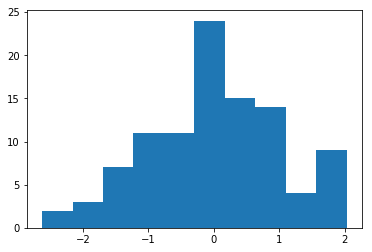

In [34]:
plt.hist(results.predict()-y)

# How to interpret the summary?
### The left part of the first table provides **basic information** about the model fit:

Element|Description
:-|:-
Dep. Variable|Which variable is the response in the model 
Model|What model you are using in the fit 
Method|How the parameters of the model were calculated
No. Observations|The number of observations (examples)
DF Residuals|Degrees of freedom of the residuals. Number of observations - number of parameters
DF Model|Number of parameters in the model (not including the constant term if present)


### The right part of the first table shows the **goodness of fit**

|Element|Description|
|:-|:----|
|R-squared |	The coefficient of determination. A statistical measure of how well the regression line approximates the real data points|
|Adj. R-squared| 	The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals|
|F-statistic |	A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals|
|Prob (F-statistic) |	The probability that you would get the above statistic, given the null hypothesis that they are unrelated|
|Log-likelihood |	The log of the likelihood function.|
|AIC 	|The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.|
|BIC 	|The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.|

### The second table reports for each of the **coefficients**

|Element|Description|
|:-|:----|
|coef| 	The estimated value of the coefficient|
|std err| 	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.|
|t| 	The t-statistic value. This is a measure of how statistically significant the coefficient is.|
|P > \|t\|| 	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.|
|\[95.0% Conf. Interval\]|The lower and upper values of the 95% confidence interval|

 

### Finally, there are several statistical tests to assess the **distribution of the residuals**

|Element| 	Description|
|:-|:----|
|Skewness |	A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).|
|Kurtosis 	|A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).|
|Omnibus 	|D'Angostino's test. It provides a combined statistical test for the presence of skewness and kurtosis.|
|Prob(Omnibus)| 	The above statistic turned into a probability|
|Jarque-Bera |	A different test of the skewness and kurtosis|
|Prob (JB) |	The above statistic turned into a probability|
|Durbin-Watson| 	A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis|
|Cond. No| 	A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).|

## OLS non-linear curve but linear in parameters

In [35]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample) #generate artificial data

In [36]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     237.8
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           5.25e-28
Time:                        11:07:44   Log-Likelihood:                -30.518
No. Observations:                  50   AIC:                             69.04
Df Residuals:                      46   BIC:                             76.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.024     18.999      0.0

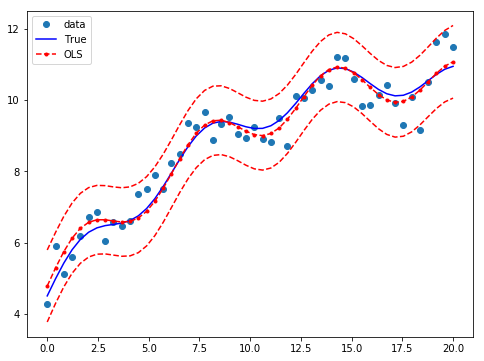

In [37]:
# Draw a plot to compare the true relationship to OLS predictions. 
# Confidence intervals around the predictions are built using the wls_prediction_std command.
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

## OLS with dummy variables
We generate some artificial data. There are 3 groups which will be modelled using dummy variables. Group 0 is the omitted/benchmark category.

In [38]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e


In [39]:
# Inspect the data:
print(X[:,:])
print(y[:5])
print(groups)
print(dummy[:5,:])

[[ 0.          0.          0.          1.        ]
 [ 0.40816327  0.          0.          1.        ]
 [ 0.81632653  0.          0.          1.        ]
 [ 1.2244898   0.          0.          1.        ]
 [ 1.63265306  0.          0.          1.        ]
 [ 2.04081633  0.          0.          1.        ]
 [ 2.44897959  0.          0.          1.        ]
 [ 2.85714286  0.          0.          1.        ]
 [ 3.26530612  0.          0.          1.        ]
 [ 3.67346939  0.          0.          1.        ]
 [ 4.08163265  0.          0.          1.        ]
 [ 4.48979592  0.          0.          1.        ]
 [ 4.89795918  0.          0.          1.        ]
 [ 5.30612245  0.          0.          1.        ]
 [ 5.71428571  0.          0.          1.        ]
 [ 6.12244898  0.          0.          1.        ]
 [ 6.53061224  0.          0.          1.        ]
 [ 6.93877551  0.          0.          1.        ]
 [ 7.34693878  0.          0.          1.        ]
 [ 7.75510204  0.          0.  

In [40]:
# fit model
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     510.8
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           2.62e-35
Time:                        11:07:45   Log-Likelihood:                -71.904
No. Observations:                  50   AIC:                             151.8
Df Residuals:                      46   BIC:                             159.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9185      0.069     13.259      0.0

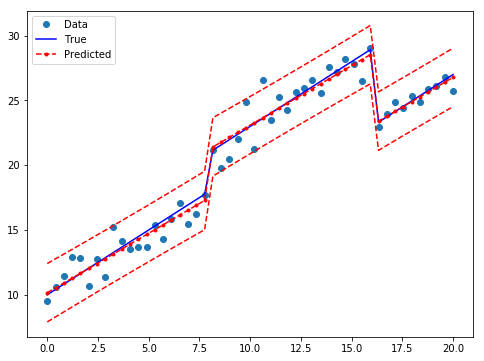

In [41]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

## Regression diagnostics
### Estimate a regression model

In [42]:
%matplotlib inline
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Load data
#url = 'http://vincentarelbundock.github.io/Rdatasets/csv/HistData/Guerry.csv'
#dat = pd.read_csv(url)
dat = pd.read_csv("boston.csv")
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('mv ~ ptratio + rooms + dis', data=dat).fit()

# Inspect the results
print(dat.head())
print(results.summary())

  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
                            OLS Regression Results                            
Dep. Variable:                     mv   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fr

### Normality of the residuals

In [43]:
# JB test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)


[('Jarque-Bera', 1696.4278708197417),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 1.5665205918344103),
 ('Kurtosis', 11.405179055594276)]

In [44]:
# omni test
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 207.05576342085843),
 ('Two-tail probability', 1.092476867994284e-45)]

## Heteroskedasticity tests
### Breush-Pagan test:

In [45]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid,results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 23.086783418826176),
 ('p-value', 3.873545560187393e-05),
 ('f-value', 7.9997570842369905),
 ('f p-value', 3.2279527981558966e-05)]

### Goldfeld-Quandt test

In [46]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 3.7973651706661045), ('p-value', 1.4644105101180242e-24)]

In [47]:
help(sms.het_goldfeldquandt)

Help on HetGoldfeldQuandt in module statsmodels.sandbox.stats.diagnostic object:

class HetGoldfeldQuandt(builtins.object)
 |  test whether variance is the same in 2 subsamples
 |  
 |  Parameters
 |  ----------
 |  y : array_like
 |      endogenous variable
 |  x : array_like
 |      exogenous variable, regressors
 |  idx : integer
 |      column index of variable according to which observations are
 |      sorted for the split
 |  split : None or integer or float in intervall (0,1)
 |      index at which sample is split.
 |      If 0<split<1 then split is interpreted as fraction of the observations
 |      in the first sample
 |  drop : None, float or int
 |      If this is not None, then observation are dropped from the middle part
 |      of the sorted series. If 0<split<1 then split is interpreted as fraction
 |      of the number of observations to be dropped.
 |      Note: Currently, observations are dropped between split and
 |      split+drop, where split and drop are the indi